<a href="https://colab.research.google.com/github/Zubrah/AI_For_Social_Good/blob/master/Spotify_Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Song Prediction and Recommendation System

**Project Background ;**


Spotify is one of the newest innovations to have come to audio listening and experience with over 125 million subscribers. Though the service has recently begun it dominates Apple Music and Amazon music in the audio streaming market. From music, they have extended the audio service to Podcasts, Audiobooks, and so on. Spotify Trends helps any content creator/musician in order to understand what listeners prefer and how to compete in this immensely growing market. 

The two main purposes of this project are
1. **Build Machine Learning predict model** 
—  To Predict Popularity of songs of any song by analyzing various metrics in the dataset. This Prediction helps any content creator/musician to understand what Spotify listeners prefer to hear more nowadays which is key in order to compete in the market.



2. **Build a spotify-content-based Recommendation** system that can suggest artists songs by tempo, danceability and popularity for any users. This helps users to listen to songs based on their music preferences.


EXPECTED APPROACH : 
- To attain the Objective it's important to start by doing Exploratory Analysis and achieve a few insights from data. Find out which features are highly correlated with the Popularity attribute. The next step is to test different model algorithms and pick the best model based on key evaluation metric (R2 Score)




In [115]:
!pip3 install spotipy

In [116]:
!pip3 install chart_studio

- Import all neccessary libraries

In [117]:
# General tools
import os
import datetime

#For data Handling
import pandas as pd
import numpy as np

#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Progress bar
from tqdm import tqdm

# For data transformations and predictions
from scipy.optimize import curve_fit
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error

# For validation
from sklearn.model_selection import train_test_split

# Data

**Dataset and It's Breakdown;**
- The  Training Dataset is taken from Kaggle Website using from Spotify’s Web API. This is basically a computer algorithm that Spotify has that can estimate various aspects of the audio file.

- The Testing, Model evaluation and Predicting Dataset is fetched directly from spotify app through the use of Spotipy library via the spotify Developer Account.



**Data Informations:**
 More info on various attributes used in the dataset is found on this Spotify Developer page.
 
Some of the key attributes present in each event in the data are:
* Key — The estimated overall key of the track. Integers map to pitches using 
standard Pitch Class notation. Ex: 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
Mode — Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* Acoustiness — A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* Danceability — Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is the most danceable.

* Energy — Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

* Instrumentalness — Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

* Loudness — The overall loudness of a track in decibels (dB). Values typical range between -60 and 0 dB.

* Valence — A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive.

* Tempo — The overall estimated tempo of a track in beats per minute (BPM).

* Popularity — The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.

**datasets information**

* data.csv: contains the songs data csv file




* data_by_artist.csv: contains the artist data csv file
* data_by_genres: contains the genres data csv file
* data_by_year.csv: contains the Year Wise data csv file
* data_w_genres.csv: contains the data with genres csv file


In [118]:
spotify_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify Mood Recommender ML/data/Mood Classification/1 Iteration ML/data/data.csv')
data_by_genres = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify Mood Recommender ML/data/Mood Classification/1 Iteration ML/data/data_by_genres.csv')
data_w_genres= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify Mood Recommender ML/data/Mood Classification/1 Iteration ML/data/data_w_genres.csv')
data_by_year = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify Mood Recommender ML/data/Mood Classification/1 Iteration ML/data/data_by_year.csv')
data_by_artist = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify Mood Recommender ML/data/Mood Classification/1 Iteration ML/data/data_by_artist.csv')

spotify_data.head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.130,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.993,['Sergei Rachmaninoff'],0.389,218773,0.088,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.363,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.996,['Ignacio Corsini'],0.485,161520,0.130,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.104,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.982,['Fortugé'],0.684,196560,0.257,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.504,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


In [119]:
data_w_genres.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [120]:
data_by_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [121]:
spotify_data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [122]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

- Observation - There are no nulls in the dataset.  This is Perfect!



# Data Exploration and Preprocessing

**Data Cleaning**

In [123]:
#Convert Milli secs duration into minutes
spotify_data['duration_min'] = spotify_data['duration_ms']/60000
spotify_data['duration_min'] = spotify_data['duration_min'].round(2)
genre_data['duration_min'] = genre_data['duration_ms']/60000
genre_data['duration_min'] = genre_data['duration_min'].round(2)

spotify_data['duration_min'].head()

0    13.86
1     3.01
2     8.33
3     3.50
4     2.78
Name: duration_min, dtype: float64

In [124]:
#Remove the Square Brackets from the artists

spotify_data["artists"]=spotify_data["artists"].str.replace("[", "")
spotify_data["artists"]=spotify_data["artists"].str.replace("]", "")
spotify_data["artists"]=spotify_data["artists"].str.replace("'", "")

spotify_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,13.86
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,3.01
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,8.33
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,3.50
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2.78


In [125]:
#Add Song decade column in the dataset
spotify_data['Song Decade'] = None

spotify_data.loc[(spotify_data['year'] >= 1920) & (spotify_data['year'] < 1930), 'Song Decade'] = '1920s'
spotify_data.loc[(spotify_data['year'] >= 1930) & (spotify_data['year'] < 1940), 'Song Decade'] = '1930s'
spotify_data.loc[(spotify_data['year'] >= 1940) & (spotify_data['year'] < 1950), 'Song Decade'] = '1940s'
spotify_data.loc[(spotify_data['year'] >= 1950) & (spotify_data['year'] < 1960), 'Song Decade'] = '1950s'
spotify_data.loc[(spotify_data['year'] >= 1960) & (spotify_data['year'] < 1970), 'Song Decade'] = '1960s'
spotify_data.loc[(spotify_data['year'] >= 1970) & (spotify_data['year'] < 1980) , 'Song Decade'] = '1970s'
spotify_data.loc[(spotify_data['year'] >= 1980) & (spotify_data['year'] < 1990) , 'Song Decade'] = '1980s'
spotify_data.loc[(spotify_data['year'] >= 1990) & (spotify_data['year'] < 2000) , 'Song Decade'] = '1990s'
spotify_data.loc[(spotify_data['year'] >= 2000) & (spotify_data['year'] < 2010) , 'Song Decade'] = '2000s'
spotify_data.loc[(spotify_data['year'] >= 2010) & (spotify_data['year'] < 2020) , 'Song Decade'] = '2010s'
spotify_data.loc[(spotify_data['year'] >= 2020) & (spotify_data['year'] < 2030) , 'Song Decade'] = '2020s'

spotify_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min,Song Decade
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,13.86,1920s
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,3.01,1920s
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,8.33,1920s
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,3.50,1920s
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2.78,1920s


In [126]:
#Remove unnecessary Braces from the genres column

data_w_genres['genres'] = data_w_genres['genres'].str.replace("'","")
data_w_genres['genres'] = data_w_genres['genres'].str.replace("[","")
data_w_genres['genres'] = data_w_genres['genres'].str.replace("]","")

data_w_genres.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,show tunes,"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [127]:
spotify_data.duplicated().any().sum()

0

In [128]:
spotify_data[(spotify_data['artists'] == "Billie Holiday") & (spotify_data['name']== "No Regrets - Take 1")]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min,Song Decade
2293,0.77,1933,0.93,Billie Holiday,0.721,155667,0.186,0,65YsrE85spoEzDa3O8iCPT,0.000145,3,0.351,-13.833,1,No Regrets - Take 1,17,1933,0.0458,129.452,2.59,1930s
2298,0.77,1933,0.93,Billie Holiday,0.721,155667,0.186,0,4FU5KzT1MaIuIV4thAY870,0.000145,3,0.351,-13.833,1,No Regrets - Take 1,17,1933,0.0458,129.452,2.59,1930s


**Observation** - There are not any duplicates in the data set because of the unique id feature.Let's see if we remove this are there any duplicates

In [129]:
spotify_data = spotify_data.drop(labels=['id', 'release_date'], axis=1)
spotify_data.shape

(170653, 19)

In [130]:
spotify_data.duplicated().sum()

565

**Observation -** After the Unique features removal, there are 565 duplicates found in the dataset which needs to be removed



In [131]:
spotify_data = spotify_data[~spotify_data.duplicated()==1]
spotify_data.shape

(170088, 19)

In [132]:
plt.rcParams.update({'font.size': 22})

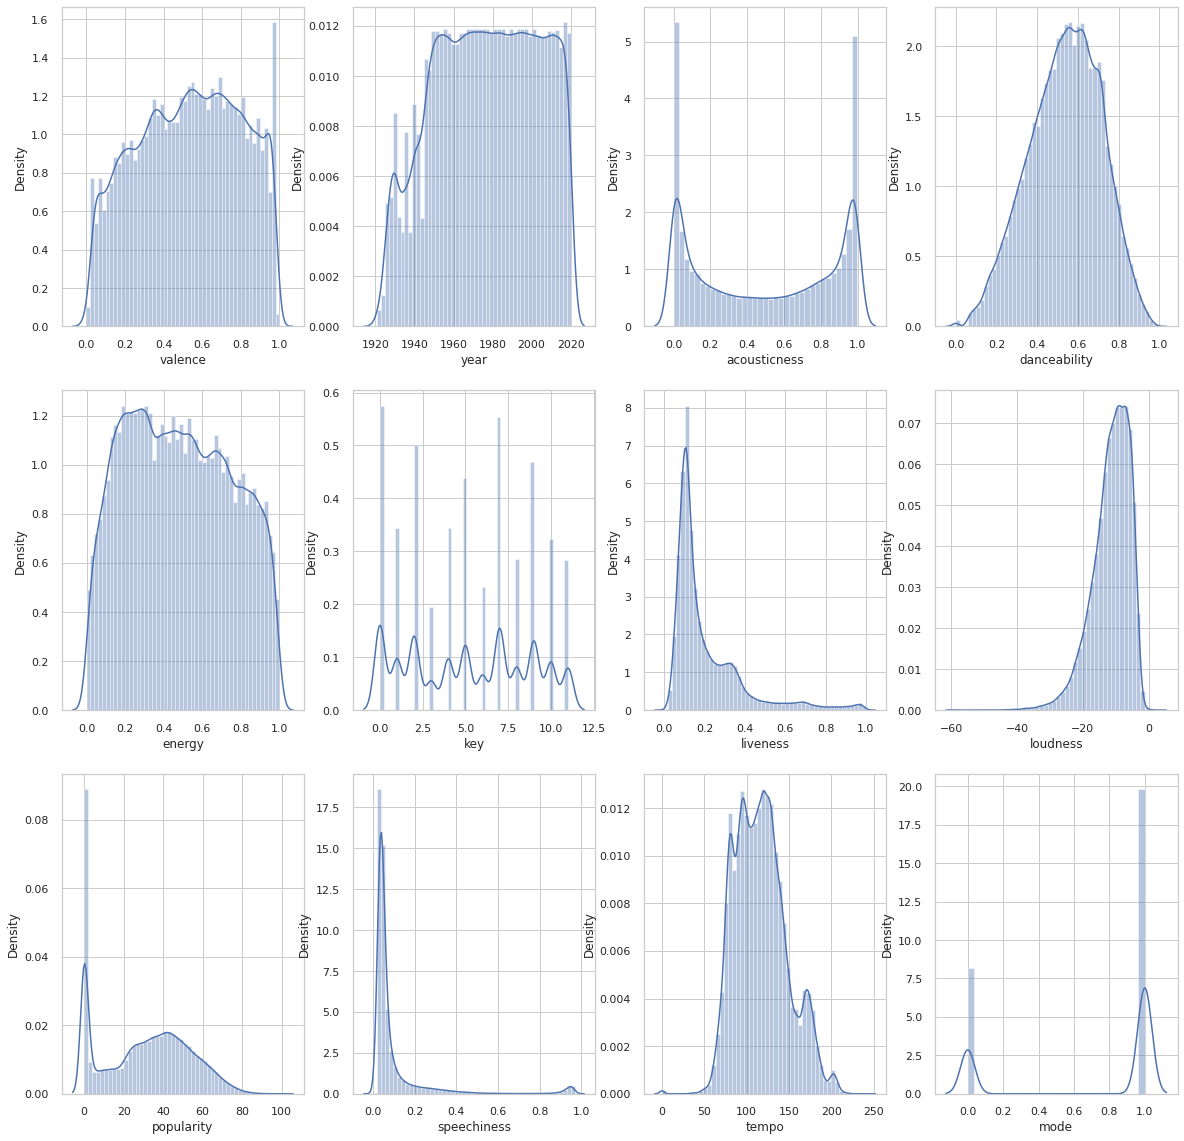

In [133]:
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(spotify_data['valence'],ax=ax[0,0])
sns.distplot(spotify_data['year'],ax=ax[0,1])
sns.distplot(spotify_data['acousticness'],ax=ax[0,2])
sns.distplot(spotify_data['danceability'],ax=ax[0,3])
#sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(spotify_data['energy'],ax=ax[1,0])
sns.distplot(spotify_data['key'],ax=ax[1,1])
sns.distplot(spotify_data['liveness'],ax=ax[1,2])
sns.distplot(spotify_data['loudness'],ax=ax[1,3])
sns.distplot(spotify_data['popularity'],ax=ax[2,0])
sns.distplot(spotify_data['speechiness'],ax=ax[2,1])
sns.distplot(spotify_data['tempo'],ax=ax[2,2])
sns.distplot(spotify_data['mode'],ax=ax[2,3])

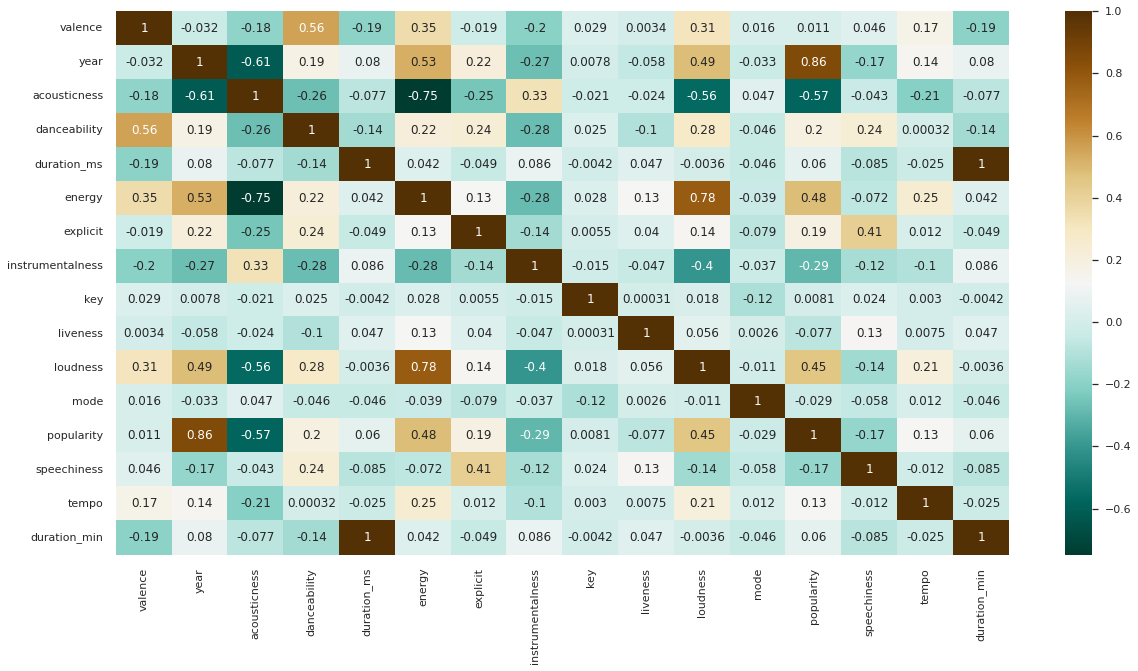

In [134]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
corr = spotify_data.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

**Observation** As you can see above, year, danceability, energy, loudness and tempo are important features for predicting popularity.

Valence and Danceability are highly related and so is speechiness and Danceability

From the above correlation table we can derive some basic insights as to what attributes make a song more popular.
-  As expected popularity is highly correlated with the year released. This makes sense as the Spotify algorithm which makes this decision generates it's "popularity" metric by not just how many streams a song receives, but also how recent those streams are.

-  Energy also seems to influence a song's popularity. Many popular songs are energetic, though not necessarily dance songs. Because the correlation here is not too high, low energy songs do have some potential to be more popular.

-  Acousticness seems to be uncorrelated with popularity. Most popular songs today have either electronic or electric instruments in them. It is very rare that a piece of music played by a chamber orchestra or purely acoustic band becomes immesely popular (though, again, not impossible).

Other things worth noting:

- Loudness and energy are highly correlated. This makes some sense as energy is definately influence by the volume the music is being played at.

- Acousticness is highly negatively correlated with energy, loudness, and year.

-  Valence and dancability are highly coorelated. Dance songs are usually happier and in a major key

Thus, from this data, it would be better for an artist to create a high energy song with either electric instruments or electronic songs to have the best chance at generating the most popularity.

**Most Populat Tracks**

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

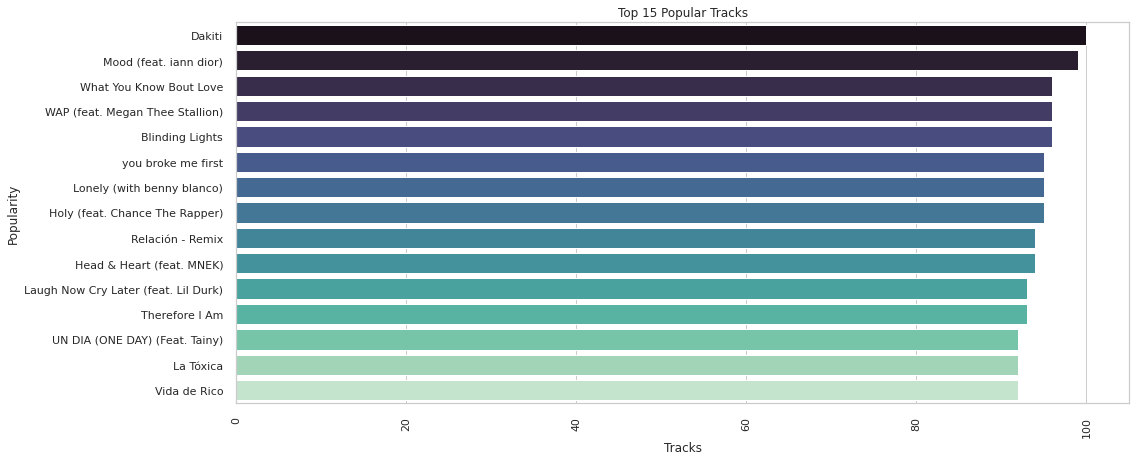

In [135]:

#Most Popular Tracks
fig, axis = plt.subplots(figsize = (16,7))
popular = spotify_data.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [136]:
spotify_data.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)


name
Dakiti                                  100.0
Mood (feat. iann dior)                   99.0
What You Know Bout Love                  96.0
WAP (feat. Megan Thee Stallion)          96.0
Blinding Lights                          96.0
you broke me first                       95.0
Lonely (with benny blanco)               95.0
Holy (feat. Chance The Rapper)           95.0
Relación - Remix                         94.0
Head & Heart (feat. MNEK)                94.0
Laugh Now Cry Later (feat. Lil Durk)     93.0
Therefore I Am                           93.0
UN DIA (ONE DAY) (Feat. Tainy)           92.0
La Tóxica                                92.0
Vida de Rico                             92.0
Name: popularity, dtype: float64

**Things noted:**


*  The popularity is heavily dependent on the timeframe.
*    As we see, Dakiti has the highest popularity rating by this graph, but was released on October 30th, 2020.
* Using this data in the regression  I will give  a snapshot as to the attributes popular songs have for mid-2020, but may not work or become less relevant once we get further from this date.





(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]), <a list of 10 Text major ticklabel objects>)

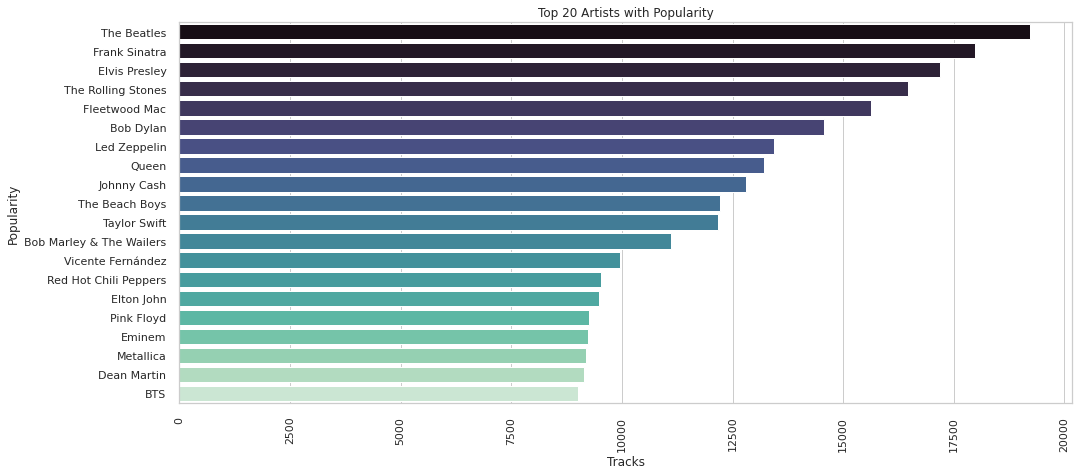

In [137]:
#Most Popular Artists
fig, axis = plt.subplots(figsize = (16,7))
popular = spotify_data.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

- Observation - Most Popular artist from 1921-2020 - Beatles



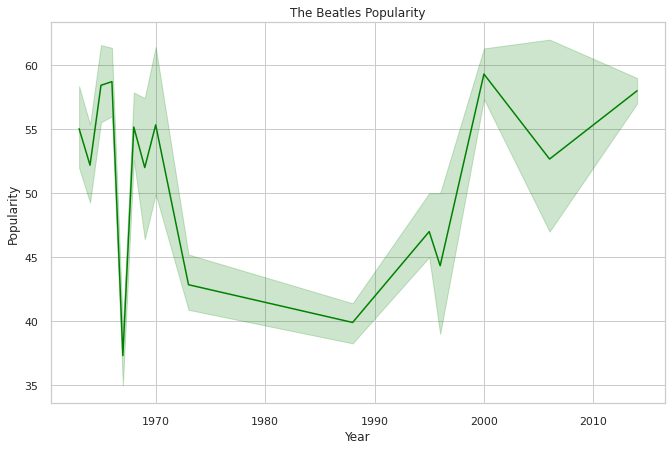

In [138]:
# visualize the popularity of The Beatles songs over the year
Beatles = spotify_data[spotify_data['artists'] == 'The Beatles']
plt.rcParams['figure.figsize'] = (11,7)
# line plot passing x,y
sns.lineplot(x='year', y='popularity', data=Beatles, color='green')
# Labels
plt.title("The Beatles Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

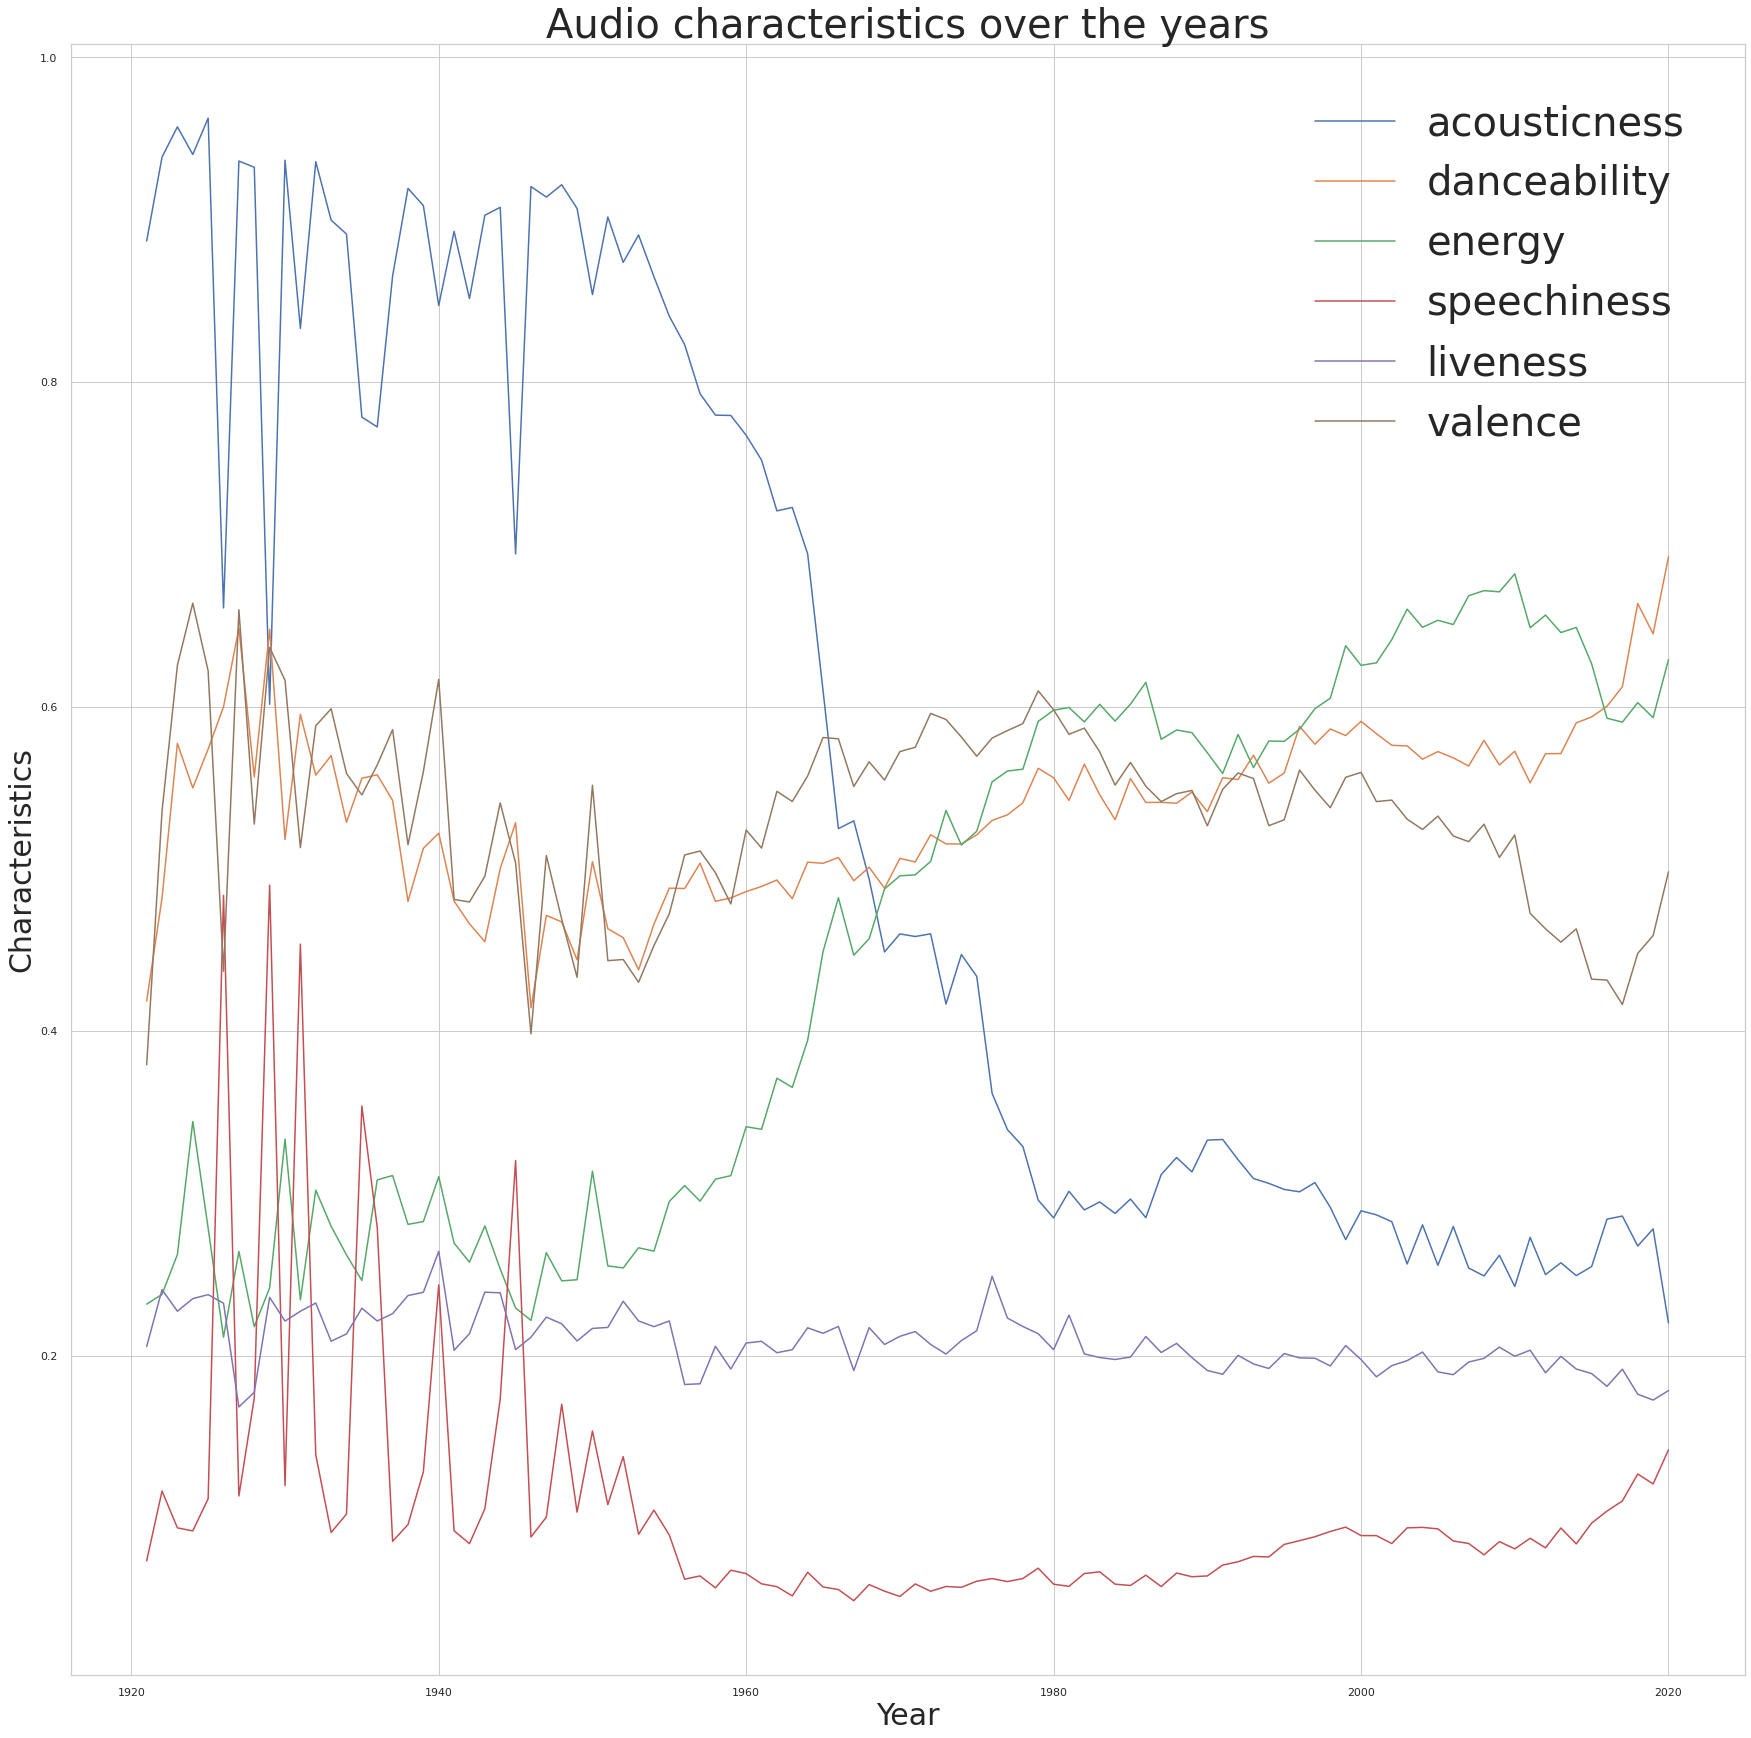

In [139]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(30,30))
for c in columns:
    x = spotify_data.groupby('year')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over the years', fontsize=40)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Characteristics',fontsize=30)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 40}, loc = 'upper right')
plt.show()

**Observation** - Over the Years we can see gradual increase for Danceability, Energy and gradual decrease for Acousticness

- Acousticness has decreased significantly. Most tracks past 1960 used electric instruments and, especially past the 1980s, electronic sounds. Most recorded music today includes both electric and electronic elements.

- Danceability has varied significantly, but has stayed mostly at the same level since 1980.

- Energy seems to be inversely related to acousticness: Was very low in the first part of the century, but then rose signficantly after 1960. It looks like it increased even more after 2000 as well.

- Speechiness looks like it varied a lot in the first part of the 20th century, but then settled low around 1960. Note we do see a slight increase after 1980. This is likely due to the growth of rap music. Mostly music, however, is still mostly sung.

- Liveness looks like it has always stayed relatively low. Most recorded music on Spotify was made with not audience present.

- Valence seems to have risen until 2000 with energy and danceability, but has fallen since.

**Artist with Most Songs**

In [140]:

y=pd.DataFrame(spotify_data['artists'].value_counts().head()).reset_index()
y.columns=['Artists','Songs_Count']
y

,Artists,Songs_Count
0,Эрнест Хемингуэй,1211
1,Эрих Мария Ремарк,1068
2,Francisco Canaro,942
3,Frank Sinatra,630
4,Ignacio Corsini,628


**Number of Songs released Yearly**

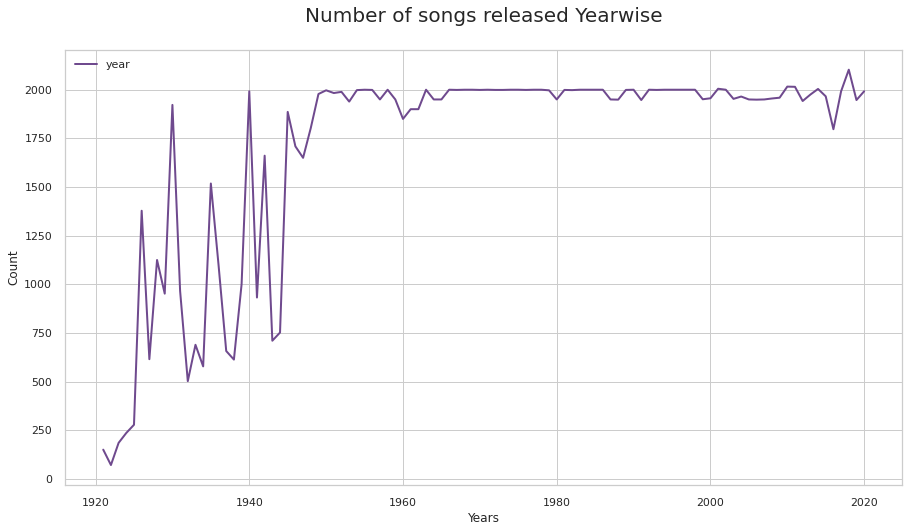

In [141]:
year = pd.DataFrame(spotify_data['year'].value_counts())
year = year.sort_index()
ax=year.plot(kind='line',figsize=(15,8) ,color='#6f4a8e', linewidth=2)
plt.title("Number of songs released Yearwise",y=1.05,fontsize=20)
plt.xlabel('Years')
plt.ylabel('Count')
ax.axes.get_xaxis().set_visible(True)

**Observation **

2103 songs are released in year 2018

From the dataset creator's own comments, it's likely these are the 2000 most popular songs from each selected year.

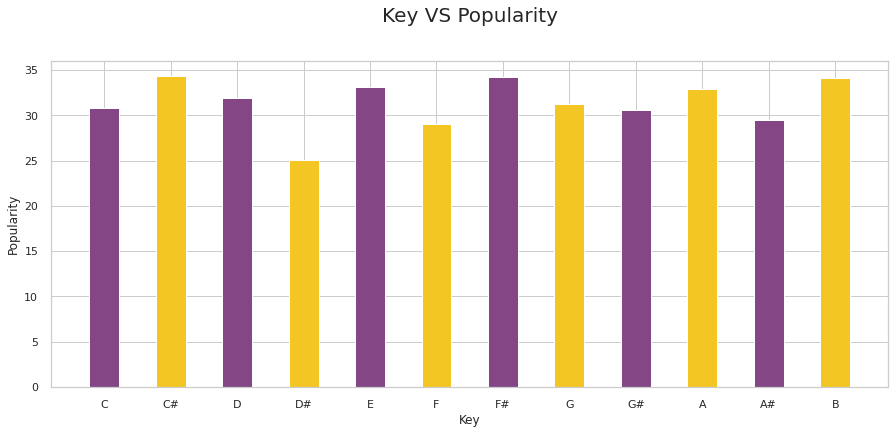

In [142]:
keypop = pd.DataFrame(spotify_data.groupby('key')['popularity'].mean()).reset_index()
keypop.replace({'key' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)

fig = plt.figure(figsize=(15,6))
plt.bar( keypop['key'],
         keypop['popularity'],
         width=0.45,
         color = ['#844685','#f3c623'])
plt.title('Key VS Popularity',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Popularity')
ax.axes.get_xaxis().set_visible(True)

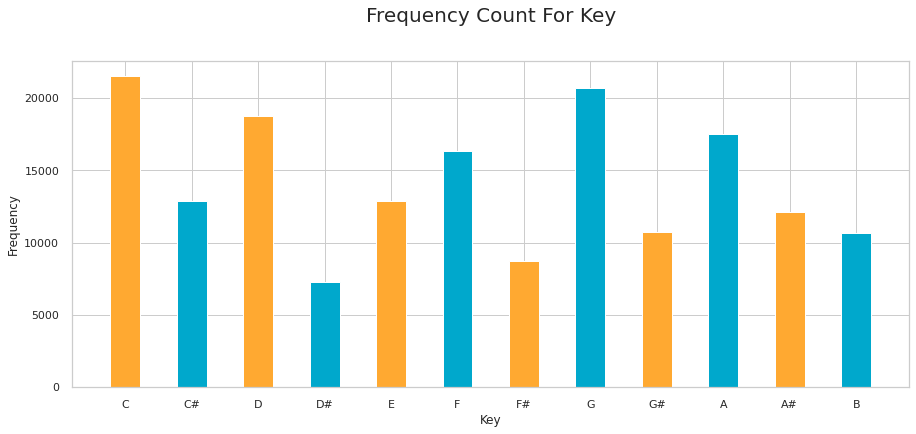

In [143]:
key = pd.DataFrame(spotify_data['key'].value_counts()).reset_index().sort_values('index')
key.replace({'index' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)
fig = plt.figure(figsize=(15,6))
plt.bar( key['index'],
         key['key'],
         width=0.45,
         color = ['#ffa931','#00a8cc'])
plt.title('Frequency Count For Key',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Frequency')
ax.axes.get_xaxis().set_visible(True)

In [144]:
data_by_genres['genres'].nunique()


2973

In [145]:
data_by_artist.artists

0                         "Cats" 1981 Original London Cast
1                                "Cats" 1983 Broadway Cast
2              "Fiddler On The Roof” Motion Picture Chorus
3           "Fiddler On The Roof” Motion Picture Orchestra
4        "Joseph And The Amazing Technicolor Dreamcoat"...
                               ...                        
28675                                                  麥志誠
28676                                                  黃品源
28677                                                  黃國隆
28678                                                   黑豹
28679                                                  조정현
Name: artists, Length: 28680, dtype: object

# Feature Selection

I hope to design a ML Model that can predicts the Popularity based on the features available. In order to select the features for the model I am using YellowbrickFeature Correlation Visualizer.

WHY  : 

This visualizer calculates Pearson correlation coefficients and mutual information between features and the dependent variable. This visualization can be used in feature selection to identify features with high correlation or large mutual information with the dependent variable.

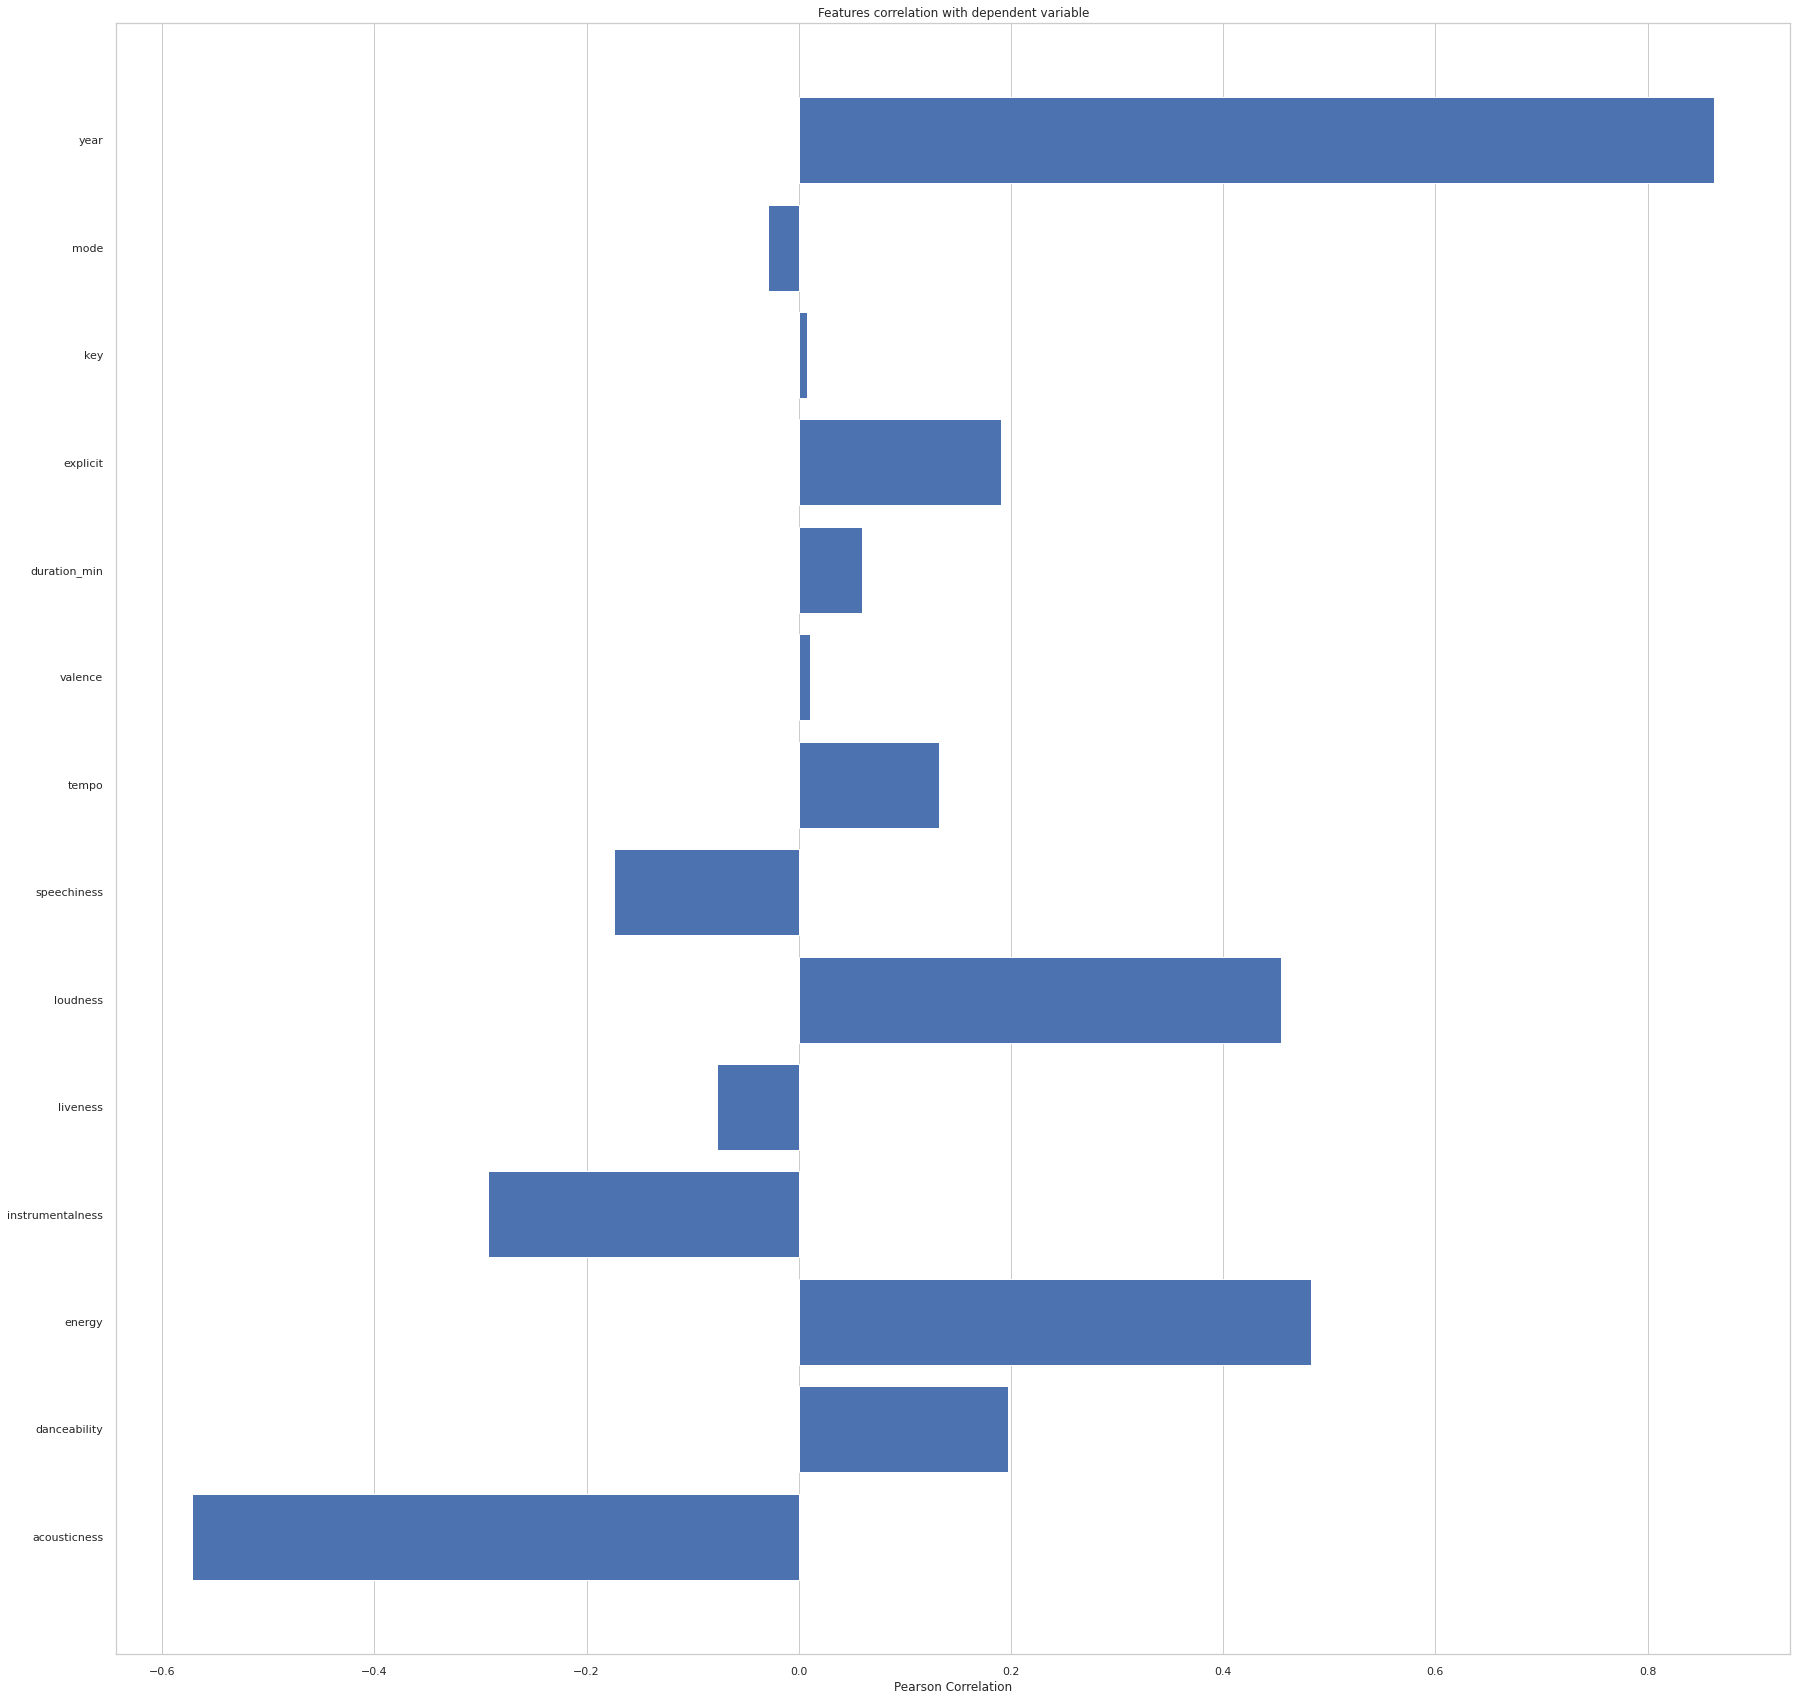

In [146]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_min','explicit','key','mode','year']

X, y = spotify_data[feature_names], spotify_data['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(30,30)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()  

**Observation** 

From the above graph it is clear that 5 features with negative correlation and 9 features with positive correlation

Feature Selection - Choosing which Features can be used in model

- id: id is unique for each track, therfore cannot assist a model and will be dropped.

- name: There are 132,940 unique values. This is bit problematic categorical feature to insert in a model, and will be dropped.

- release_date/year: Release date contains full date along with year. So instead of keeping both the columns Release_date can be dropped and year can be inserted into model

**Model Data Pre-processing**

In [147]:
cols = list(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify Mood Recommender ML/data/Mood Classification/1 Iteration ML/data/data.csv', nrows =1))
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify Mood Recommender ML/data/Mood Classification/1 Iteration ML/data/data.csv', usecols=[i for i in cols if i not in ['id','name','release_date']])

# Remove duplicated
df1 = df1[~df1.duplicated()==1]

#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(df1.drop('popularity', axis=1), df1['popularity'], test_size = 0.2, random_state = 42)

In [148]:
X_train.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
74462,0.484,2017,0.2060,['Christian French'],0.550,234192,0.580,0,0.000001,4,0.1190,-7.687,0,0.0784,82.270
146712,0.763,1975,0.5110,['The Marshall Tucker Band'],0.528,150933,0.812,0,0.000284,2,0.1570,-4.983,1,0.0517,110.442
158411,0.931,1959,0.8230,"[""Anita O'Day""]",0.460,125707,0.303,0,0.000000,0,0.0676,-12.567,0,0.1070,170.608
109710,0.329,1942,0.0117,['Orchestra Studio 7'],0.582,224967,0.443,0,0.868000,7,0.0895,-12.506,1,0.0307,94.825
128817,0.585,1960,0.7820,['Quincy Jones'],0.681,138467,0.312,0,0.072800,8,0.1690,-11.488,1,0.0723,121.058


Here we need to replace/modify few data

- object data of the artists with some numerical indicator that identify the artist.
- Eliminates Zero values from tempo columns and replace it
- standardizing Instrumental Criteria with numeric values
- We use OneHotEncoder from SKlearn to create dummies
- MinMaxScaling for relevant features
Target Scaling

**Feature Transformations**

In [149]:
class Artists:
    """
     This transformer recives a DF with a feature 'artists' of dtype object
      and convert the feature to a float value as follows:
      1. Replace the data with the artists mean popularity
      2. Replace values where artists appear less than MinCnt with y.mean()
      3. Replace values where artists appear more than MaxCnt with 0
      
      PARAMETERS:
      ----------
      MinCnt (int): Minimal treshold of artisits apear in dataset, default = 3
      MaxCnt (int): Maximal treshold of artisits apear in dataset, default = 600

      RERTURN:
      ----------
      A DataFrame with converted artists str feature to ordinal floats
    
    """
    def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
        self.MinCnt = MinCnt
        self.MaxCnt = MaxCnt
        self.artists_df = None

    def fit (self, X, y):
        self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
        self.artists_df.loc['unknown'] = [y.mean(), 1]
        self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
        self.artists_df.loc[self.artists_df['count'] >= self.MaxCnt, 'mean'] = 0
        return self

    def transform(self, X, y=None):
        X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
        X['artists'] = X['artists'].map(self.artists_df['mean'])
        return X
  
    
#Instrumental Transformer Criteria

def instrumental(X):
    X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))
    
    
class Tempo():
    """Eliminates Zero values from tempo columns and replace it 
       with the median or mean of non-zero values as specified.
       defaut is set to 'median'.
    """

    def __init__(self, method='median'):
        self.method = method

    def transform(self, X):
        if self.method == 'median':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].median()
        elif self.method == 'mean':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].mean()
        else:
            raise Exception("Method can be 'median' or 'mean' only!")
        return X

In [150]:
# Apply Aritists class on train and test seperatly
artists_transformer = Artists(MinCnt=2)
X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
X_test = artists_transformer.transform(X_test, y_test)

#Apply Instrumental Criteria on train & test seperately
instrumentalness_tranformer = FunctionTransformer(instrumental)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)

#Apply Tempo Transformer class on Train & Test seperately
tempo_transformer = Tempo()
X_train = tempo_transformer.transform(X_train)
X_test = tempo_transformer.transform(X_test)

**ONE HOT ENCODER**

In [151]:
ohe = OneHotEncoder(categories='auto', drop='first')

# Train
feature_arr = ohe.fit_transform(X_train[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_train['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_train['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_train.index)
X_train = pd.concat([X_train, features], axis=1).drop(['key','instrumentalness'], axis=1)

# Test
feature_arr = ohe.fit_transform(X_test[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_test['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_test['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_test.index)
X_test = pd.concat([X_test, features], axis=1).drop(['key','instrumentalness'], axis=1)

MINMAX SCALER

In [152]:
scaler = MinMaxScaler()
cols = ['artists','duration_ms','loudness','tempo']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

TARGET SCALING

In [153]:
# Divide the popularity by 100
y_train = y_train / 100
y_test = y_test / 100

# MODELS

**1. Decision Tree Regressor Model**

In [154]:
def Decision_tree(X_train,y_train,X_test,y_test,min_samples_split,max_leaf_nodes):
    """
    Design ML model and returns r2-score and Mean squared Error for Train and Test Datasets
    
    INPUT:
    :param X_train: 
    :param y_train: 
    :param X_test: 
    :param y_test: 
    :param min_samples_split: 
    :param max_leaf_nodes: 
    OUTPUT:
    train_rmse - Root Mean Squared Error for Train dataset
    test_rmse - Root Mean Squared Error for Train dataset
    r2_train - r2-score for Train Dataset
    r2_test - r2-score for Test Dataset
    y_train_pred and y_test_pred - For Visualizing purpose
    mae - Mean Absolute Error
    """
    
    
    tree = DecisionTreeRegressor(max_leaf_nodes =max_leaf_nodes , min_samples_split =min_samples_split )
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    train_rmse = np.sqrt(mse(y_train, y_train_pred))
    
    y_test_pred = tree.predict(X_test)
    test_rmse = np.sqrt(mse(y_test, y_test_pred))
    
    r2_train = r2_score(y_train, y_train_pred)
    
    r2_test= r2_score(y_test, y_test_pred)
    
    mae = (abs(y_test - y_test_pred)).mean() 
    
    return train_rmse,test_rmse,r2_train,r2_test,y_train_pred,y_test_pred,mae

train_rmse, test_rmse, r2_train, r2_test,y_train_pred,y_test_pred,mae= Decision_tree(X_train,y_train,X_test,y_test,min_samples_split = 200,max_leaf_nodes=167)

print("Root Mean Squared Error for Train dataset is {}".format(train_rmse))
print("Root Mean Squared Error for Test  dataset is {}".format(test_rmse))
print("r2-score for Train Dataset is {}".format(r2_train))
print("r2-score for Test Dataset is {}".format(r2_test))
print("Mean Absolute Error for Test dataset is {}".format(mae))

Root Mean Squared Error for Train dataset is 0.08769988801533653
Root Mean Squared Error for Test  dataset is 0.10884646442377648
r2-score for Train Dataset is 0.8381548180085765
r2-score for Test Dataset is 0.748962091683729
Mean Absolute Error for Test dataset is 0.07926579723971713


In [155]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((136020, 26), (136020,), (34005, 26), (34005,))

In [156]:
y_train_pred.shape, y_test_pred.shape

((136020,), (34005,))

**TRAINED DATA RESULT**

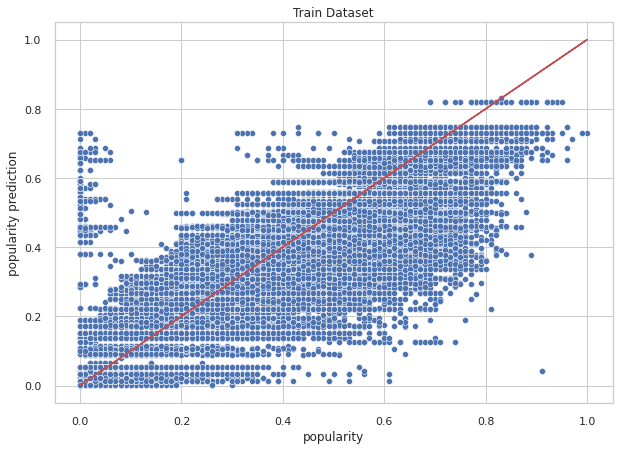

In [157]:
# Plot the results for Train Datasets
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
ax.set_ylabel('popularity prediction')
ax.set_title('Train Dataset')
plt.show()

**TEST DATASET RESULT**

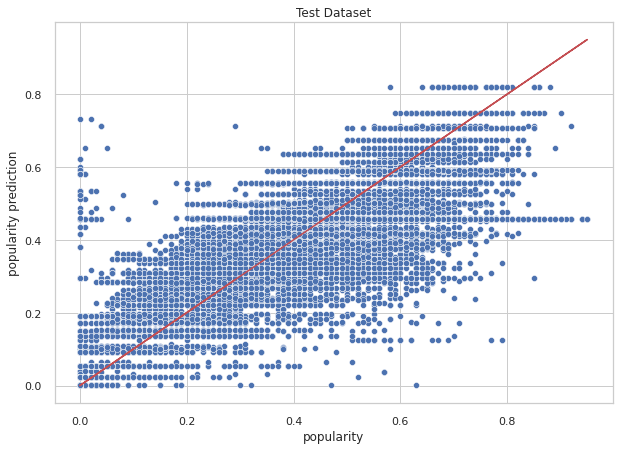

In [158]:
#plot the results for Test dataset
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')
ax.set_ylabel('popularity prediction')
ax.set_title('Test Dataset')
plt.show()

**2. DECISION TREE WITH GRIDSEARCH CV**

AIM;

Using GridSearchCV to find the optimal hyperparameters for the decision tree to predict song popularity.



In [159]:
n_features = spotify_data.shape[1]
n_samples = spotify_data.shape[0]
 
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), cv=3, n_jobs=-1, verbose=5,
                    param_grid ={
                    'max_depth': [None,5,6,7,8,9,10,11],
                    'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7, n_features//2, n_features//3, ],
                    'min_samples_split': [2,0.3,0.5, n_samples//2, n_samples//3, n_samples//5],
                    'min_samples_leaf':[1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//5]},
                    )
 
grid.fit(X_train, y_train)
print('Train R^2 Score : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%grid.best_estimator_.score(X_test,y_test))
print('Best R^2 Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
Train R^2 Score : 0.840
Test R^2 Score : 0.766
Best R^2 Score Through Grid Search : 0.829
Best Parameters :  {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [160]:
# Decision tree with tuned hyperparameters using GridSearchCV
dec_tree2 = DecisionTreeRegressor(max_depth=9, max_features=None, 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0)
dec_tree2.fit(X_train,y_train)
y_test_pred2 = dec_tree2.predict(X_test)
mae2 = mean_absolute_error(y_test, y_test_pred2)
print(f'Mean absolute error of this model: {mae2:.3f}')

Mean absolute error of this model: 0.073


Tweaking the max_leaf_nodes arguments

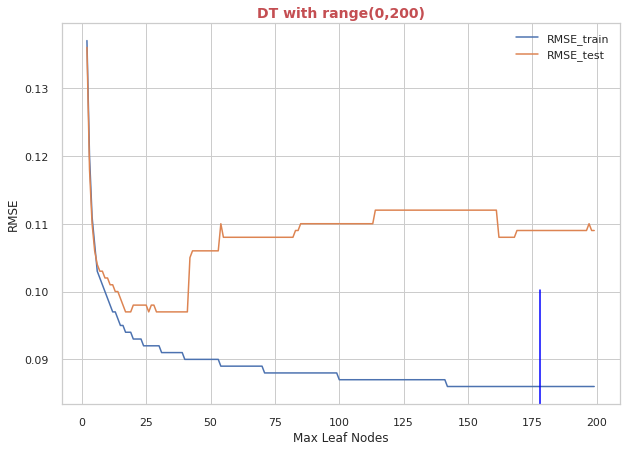

In [171]:
RMSE3_train, RMSE3_test = [], []

for i in range(2,200):
    tree = DecisionTreeRegressor(random_state = 15, max_leaf_nodes=i)
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train).clip(0, 1)
    train_rmse = np.sqrt(mse(y_train, y_train_pred))
    RMSE3_train.append(train_rmse.round(3))
    y_test_pred = tree.predict(X_test).clip(0, 1)
    test_rmse = np.sqrt(mse(y_test, y_test_pred))
    RMSE3_test.append(test_rmse.round(3))
x = np.arange(2, 200)
ax = sns.lineplot(x=x, y=RMSE3_train)
sns.lineplot(x=x, y=RMSE3_test, ax=ax)
ax.axvline(x=178, ymin=0, ymax=0.3, color='blue')
# ax.axvline(x=139, ymin=0.5, ymax=0.8, color='orange')
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Max Leaf Nodes')
ax.set_ylabel('RMSE')
ax.set_title('DT with range(0,200)', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

In [ ]:
gap3 = [(RMSE3_train[i]/RMSE3_test[i]) for i, num in enumerate(RMSE3_train)]

print(f'Minimum validiation is: {min(gap3):.3%} in index number {gap3.index(min(gap3))}')
print(f'Maximum validiation is: {max(gap3):.3%} in index number {gap3.index(max(gap3))}')



- I also tested the data with different test size, 
in order to check the influence on the results.

- Eventually, the best model was a Decision Tree run with test size = 0.2, max_leaf_nodes = 167, max_depth = 9, min_samples_leaf = 1, min_samples_split = 2.

**3. RANDOMFOREST REGRESSOR**

In [163]:
def Randomforest(X_train,y_train,X_test,y_test):
    """
    Design Random Forest Regressor model and returns r2-score and Mean squared Error for Train and Test Datasets
    INPUT:
    :param X_train: 
    :param y_train: 
    :param X_test: 
    :param y_test: 
    OUTPUT:
    Test Accuracy
    Mean Absolute Error
    r2-score for Train and Test datasets
    """
    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)
    
    preds = clf.predict(X_test)

    accuracy = clf.score(X_test, y_test)

    mae = (abs(y_test - preds)).mean() 
    y_train_pred = clf.predict(X_train)
    
    y_test_pred = tree.predict(X_test)

    
    r2_train = r2_score(y_train, y_train_pred)
    
    r2_test= r2_score(y_test, y_test_pred)
    
    return accuracy,mae,r2_train,r2_test

accuracy,mae,r2_train,r2_test =  Randomforest(X_train,y_train,X_test,y_test)
print("Test Accuracy: {:.4f}".format(accuracy*100))
print("Mean Absolute Error: {:.4f} ".format(mae))
print("r2-score of Train Dataset is {}".format(r2_train*100))
print("r2-score of Test Dataset is {}".format(r2_test*100))


Test Accuracy: 77.4292
Mean Absolute Error: 0.0758 
r2-score of Train Dataset is 97.60732329548345
r2-score of Test Dataset is 74.68737002473064


# ARTIST RECOMMENDATION SYSTEM

Build a content-based recommendation engine which suggests artists



In [186]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify Mood Recommender ML/data/Mood Classification/1 Iteration ML/data/data.csv')


In [187]:
#Remove the Square Brackets from the artists

df["artists"]=df["artists"].str.replace("[", "")
df["artists"]=df["artists"].str.replace("]", "")
df["artists"]=df["artists"].str.replace("'", "")

In [188]:
def normalize_column(col):
    """
    col - column in the dataframe which needs to be normalized
    """
    max_d = df[col].max()
    min_d = df[col].min()
    df[col] = (df[col] - min_d)/(max_d - min_d)

In [190]:
#Normalize allnumerical columns so that min value is 0 and max value is 1
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)
for col in num.columns:
    normalize_column(col)
    

**Kmeans Clustering**

In [191]:
km = KMeans(n_clusters=25)
pred = km.fit_predict(num)
df['pred'] = pred
normalize_column('pred')


In [192]:
#Song Recommender
class Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        #choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                #indeces of non-numerical columns(id,Release date,name,artists)
                if not col in [3,8,14,16]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name']
        return rem_data[columns][:n_top]

In [193]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,pred
0,0.0594,0.0,0.985944,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.282389,0.153112,0.211,0.0,4BJqT0PrAfrxzMOxytFOIz,0.878000,0.909091,0.665,0.624916,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.04,1921,0.037732,0.332450,0.791667
1,0.9630,0.0,0.734940,Dennis Day,0.828947,0.032496,0.341,0.0,7xPhfUan2yNtyFG0cUWkt8,0.000000,0.636364,0.160,0.744797,1.0,Clancy Lowered the Boom,0.05,1921,0.427835,0.250243,0.250000
2,0.0394,0.0,0.964859,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.331984,0.091685,0.166,0.0,1o6I8BglA6ylDMrIELygv1,0.913000,0.272727,0.101,0.707071,1.0,Gati Bali,0.05,1921,0.034948,0.453125,0.458333
3,0.1650,0.0,0.970884,Frank Parker,0.278340,0.037954,0.309,0.0,3ftBPsC5vPBKxYSee08FDH,0.000028,0.454545,0.381,0.793736,1.0,Danny Boy,0.03,1921,0.036495,0.411113,0.666667
4,0.2530,0.0,0.960843,Phil Regan,0.423077,0.029932,0.193,0.0,4d6HGyGT8e121BsdKmw9v6,0.000002,0.272727,0.229,0.781521,1.0,When Irish Eyes Are Smiling,0.02,1921,0.039175,0.417503,0.708333


In [194]:
#Instanstiate the Recommender Class
recommender = Song_Recommender(df)
recommender.get_recommendations('Red Roses (feat. Landon Cube)', 5)

100%|██████████| 170652/170652 [00:14<00:00, 12061.15it/s]


,artists,name
57027,"Vince Staples, 6LACK, Mereba","Yo Love - From ""Queen & Slim: The Soundtrack"""
38257,"Post Malone, Halsey, Future",Die For Me (feat. Future & Halsey)
170466,5 Seconds of Summer,Old Me
108530,Julia Michaels,Falling For Boys
155437,"Matt Maeson, Lana Del Rey",Hallucinogenics (feat. Lana Del Rey)


In [195]:
recommender.get_recommendations('senorita', 10)


100%|██████████| 170652/170652 [00:13<00:00, 12720.47it/s]


,artists,name
16102,Ashanti,Happy
167923,"Calle 13, Bajofondo Tango Club, Panasuyo",Tango del Pecado (feat. Bajofondo Tango Club &...
70797,DMX,I Can Feel It
70049,The Click,Hurricane
103490,11/5,Garcia Vegas
34002,Molotov,Gimme Tha Power
70617,"Missy Elliott, 702, Magoo",Beep Me 911 (feat. 702 & Magoo)
165639,"Mack 10, Ice Cube, WC",Westside Slaughterhouse
168158,Paull Wall & Chamillionaire,N Luv Wit My Money
88044,Eve,Gotta Man


In [196]:
recommender.get_recommendations('lonely', 10)


100%|██████████| 170636/170636 [00:12<00:00, 13665.19it/s]


,artists,name
155318,Melanie Martinez,Drama Club
37160,"T-Pain, B.o.B",Up Down (Do This All Day) (feat. B.o.B)
107524,"T-Pain, B.o.B",Up Down (Do This All Day) (feat. B.o.B)
73283,Amy Winehouse,Half Time
154848,YoungBoy Never Broke Again,War with Us
37601,Melanie Martinez,Cry Baby
17520,Mike Jones,Next to You
169633,Marvin Dark,Picture This
37501,McCafferty,Bottom
35747,"Lupe Fiasco, Jill Scott",Daydreamin' (feat. Jill Scott)


In [197]:
recommender.get_recommendations('lovely', 10)


100%|██████████| 170649/170649 [00:12<00:00, 13202.33it/s]


,artists,name
56328,"Troye Sivan, Alex Hope",BLUE
37077,Michael Bublé,All I Want for Christmas Is You
169971,Sabrina Claudio,Stand Still
73857,Lana Del Rey,Money Power Glory
107916,Adele,Love in the Dark
55443,Michael Bublé,All I Want for Christmas Is You
91236,Lana Del Rey,Art Deco
74306,Seafret,Oceans
71369,Céline Dion,I Surrender
35159,"Alicia Keys, Tony! Toni! Toné!, Jermaine Paul",Diary (feat. Tony! Toni! Tone! & Jermaine Paul)


In [202]:
recommender.get_recommendations('sad', 5)


100%|██████████| 170651/170651 [00:13<00:00, 13023.25it/s]


,artists,name
107404,Bo Burnham,From God's Perspective
108462,"Curren$y, Harry Fraud, Wiz Khalifa",The Count (feat. Wiz Khalifa)
18995,"Kamaiyah, YG",Fuck It Up (feat. YG)
168971,Corey Smith,Fuck The Po-Po - Live
106871,"Kendrick Lamar, BJ The Chicago Kid",Kush & Corinthians (feat. BJ The Chicago Kid)


**Final results and Observations**

- The recommender systems takes songs arguments such as lovely,sad,happy, energy and predict the possible songs playlist
- The user can define the quantity/number of songs to be returned for playlist to return



**SIGNIFICANCE OF THE PROJECT**


* Increases user satisfaction and engagement.
* Can be intergrated to music platforms for maximum personalizations of playlists.
* Provides quality and immersive customer streaming experience.


**FUTURE PLANS**


*  Use the ready made algorithms to categorize music playlist based on mood classifications
*   Increase efficiency of the algorithim.
* Deploy the model with Spotify informations and ID.



